In [12]:
from relie.flow import LocalDiffeoTransformedDistribution
from relie.lie_distr import SO3ExpTransform
from relie.utils.data import TensorLoader, cycle
from relie.utils.so3_tools import so3_exp
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt


In [14]:
def bump(x, loc=0, scale=1.):
    x = (x-loc) / scale
    eps = 1E-5
    mask = x**2 > 1-eps
    x = np.where(mask, 1-eps, x)
    y = np.where(mask, 0., np.exp(-1/(1-x**2)))
    return y

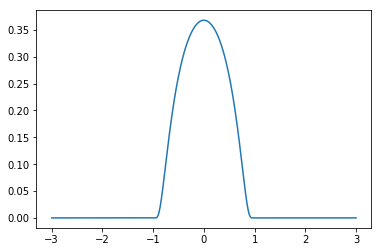

In [16]:
x = np.linspace(-3, 3, 1000)
plt.plot(x, bump(x))
plt.show()

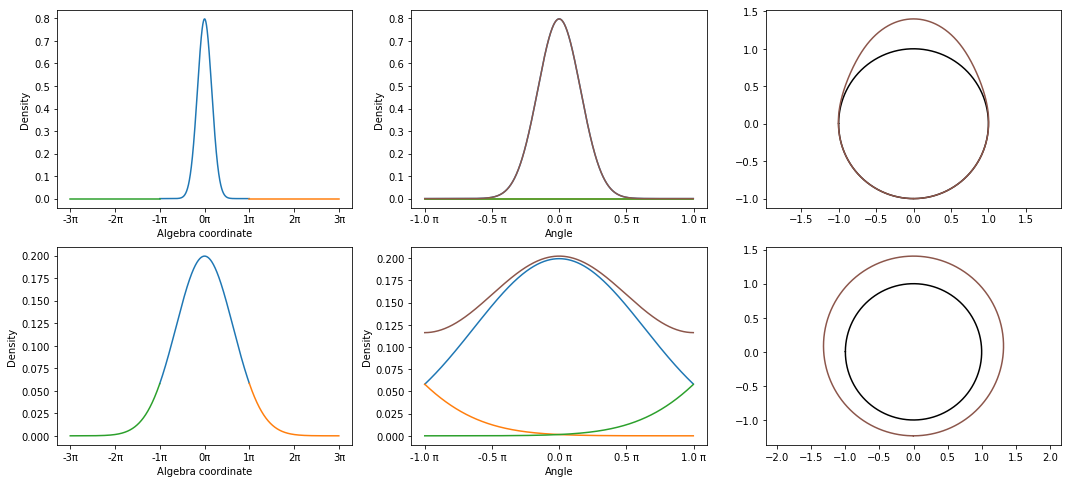

In [286]:

pi_range = np.linspace(-np.pi, np.pi, 1000, endpoint=False)
wrappers = np.array([0, 1, -1])
x = pi_range[None] + wrappers[:, None] * 2 * np.pi


# scales = [0.1, 1, 1.5, 2, 3, 6, 10]
scales = [0.5, 2]
fig, axes = plt.subplots(len(scales), 3, figsize=(18, 4 * len(scales)))
for s, scale_axes in zip(scales, axes):
    p = norm(scale=s, loc=0.).pdf(x)
#     p = bump(x, scale=s)
#     scale_axes[0].set_title(f"Scale {s}, tangent")
#     scale_axes[1].set_title(f"Scale {s}, wrapped")
    
    cmap = plt.get_cmap('tab10', 10)
    for i in range(x.shape[0]):
        scale_axes[0].plot(x[i], p[i] ,c=cmap(i), label=str(wrappers[i]))
    for i in range(x.shape[0]):
        scale_axes[1].plot(pi_range, p[i],c=cmap(i), label=str(wrappers[i]))
    scale_axes[1].plot(pi_range, p.sum(0),c=cmap(5), label='sum')
#     scale_axes[1].legend()
    
    r = 1 + p.sum(0) * s
    xs, ys = r * np.cos(pi_range), r * np.sin(pi_range)
    th = np.pi / 2
    scale_axes[2].plot(np.cos(pi_range), np.sin(pi_range), c="black")
    scale_axes[2].plot(r * np.cos(pi_range+th), r * np.sin(pi_range+th), c=cmap(5))
    m = xs.max() + 0.2
    scale_axes[2].set_xlim([-m, m])
    scale_axes[2].set_ylim([-m, m])
#     scale_axes[2].axis("off")
    scale_axes[2].axis('equal')
    
    
    scale_axes[0].set_xlabel("Algebra coordinate")    
    scale_axes[0].set_ylabel("Density")
    scale_axes[1].set_xlabel("Angle")
    scale_axes[1].set_ylabel("Density")
    ticks = np.linspace(-3*np.pi, 3*np.pi, 7, endpoint=True)
    scale_axes[0].set_xticks(ticks) 
    scale_axes[0].set_xticklabels([f"{i:.0f}π" for i in ticks/np.pi]) 
    
    
    ticks = np.linspace(-np.pi, np.pi, 5, endpoint=True)
    scale_axes[1].set_xticks(ticks) 
    scale_axes[1].set_xticklabels([f"{i:.1f} π" for i in ticks/np.pi]) 
plt.show()

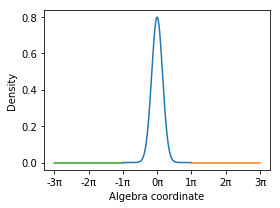

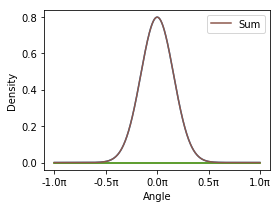

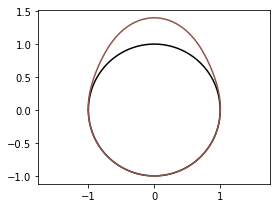

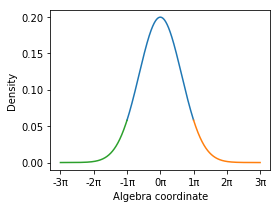

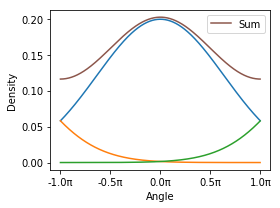

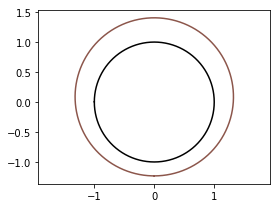

In [305]:

pi_range = np.linspace(-np.pi, np.pi, 1000, endpoint=False)
wrappers = np.array([0, 1, -1])
x = pi_range[None] + wrappers[:, None] * 2 * np.pi


# scales = [0.1, 1, 1.5, 2, 3, 6, 10]
scales = [0.5, 2]
names = ['small', 'big']
for s, name in zip(scales, names):
    p = norm(scale=s, loc=0.).pdf(x)
    
    fig = plt.figure(figsize=(4, 3))
    ax = plt.gca()
    cmap = plt.get_cmap('tab10', 10)
    for i in range(x.shape[0]):
        ax.plot(x[i], p[i] ,c=cmap(i), label=str(wrappers[i]))
        
    ax.set_xlabel("Algebra coordinate")    
    ax.set_ylabel("Density")
    
    ticks = np.linspace(-3*np.pi, 3*np.pi, 7, endpoint=True)
    ax.set_xticks(ticks) 
    ax.set_xticklabels([f"{i:.0f}π" for i in ticks/np.pi]) 
    plt.tight_layout()
    plt.savefig(f"wrap/{name}-alg.pdf")
    plt.show()
    
    fig = plt.figure(figsize=(4, 3))
    ax = plt.gca()
    for i in range(x.shape[0]):
        ax.plot(pi_range, p[i],c=cmap(i))
    ax.plot(pi_range, p.sum(0),c=cmap(5), label='Sum')
    ax.legend()

    ax.set_xlabel("Angle")
    ax.set_ylabel("Density")
    ticks = np.linspace(-np.pi, np.pi, 5, endpoint=True)
    ax.set_xticks(ticks) 
    ax.set_xticklabels([f"{i:.1f}π" for i in ticks/np.pi]) 
    plt.tight_layout()
    plt.savefig(f"wrap/{name}-group.pdf")
    plt.show()
    
    fig = plt.figure(figsize=(4, 3))
    ax = plt.gca()
    
    r = 1 + p.sum(0) * s
    xs, ys = r * np.cos(pi_range), r * np.sin(pi_range)
    th = np.pi / 2
    ax.plot(np.cos(pi_range), np.sin(pi_range), c="black")
    ax.plot(r * np.cos(pi_range+th), r * np.sin(pi_range+th), c=cmap(5))
    m = xs.max() + 0.2
    ax.set_xlim([-m, m])
    ax.set_ylim([-m, m])
    ax.axis('equal')
    plt.tight_layout()
    plt.savefig(f"wrap/{name}-circle.pdf")
    plt.show()

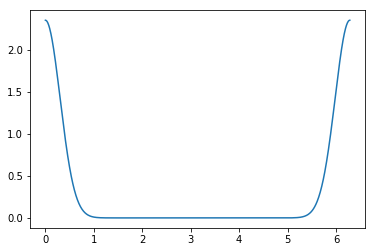

In [90]:
scale = 0.3
mean = torch.tensor([0., 0., 0.])
alg_distr = Normal(mean.double(), scale*torch.ones(3).double())
group_distr = LocalDiffeoTransformedDistribution(
    alg_distr, SO3ExpTransform(k_max=10))

n = 1000
v = torch.tensor([1., 0, 0]).double()
eps = 1E-4
t = torch.linspace(eps, 2 * np.pi-eps, n).double()
alg_points = t[:, None] * v / v.norm()
g_points = so3_exp(alg_points)
# g_points[0] = torch.eye(3).double()
log_prob = group_distr.log_prob(g_points)
prob = torch.exp(log_prob)

plt.plot(np.array(t), np.array(prob))
plt.show()

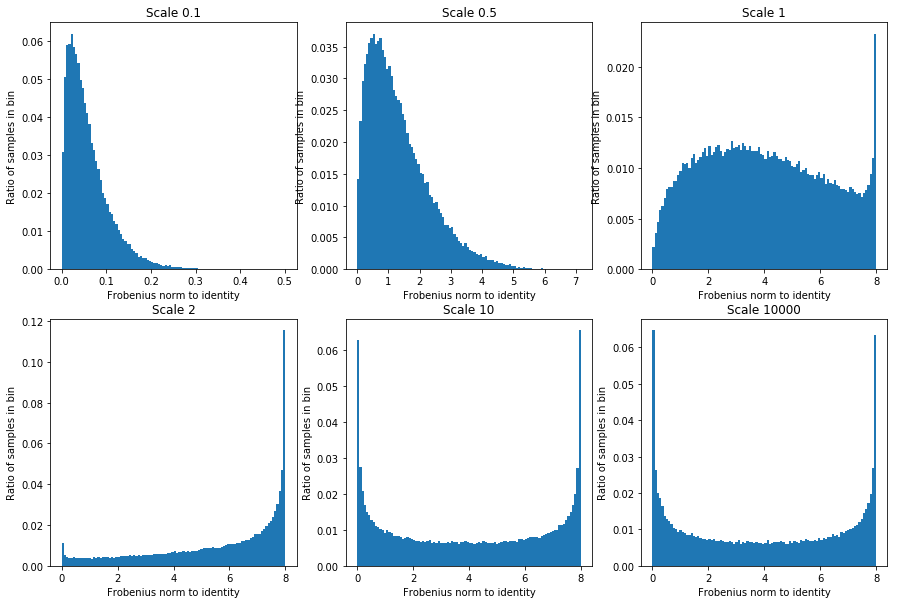

In [188]:
def sample(scale, n, reject=None):
    v = torch.randn(n, 3, dtype=torch.double) * scale
    norms = (v ** 2).sum(1).sqrt()
    if reject is not None:
        v = v[norms < 1.5 * np.pi]
    samples = so3_exp(v)
    return samples

def sample_uniform(scale, n, dims=3):
    d = torch.randn(n, dims, dtype=torch.double)
    d = d / d.norm(dim=1, keepdim=True)
    r = torch.rand(n, 1, dtype=torch.double) ** (1./dims)
    return r * d * scale
    


scales = [0.1, 0.5, 1, 2, 10, 10000]
n = 100000
rows, cols = (len(scales) - 1) // 3 + 1, 3
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows))
for scale, ax in zip(scales, axes.flatten()):
    samples = sample(scale, n)
    diff = samples - torch.eye(3).double()
    ds = (diff ** 2).sum(2).sum(1)
    ax.set_title(f"Scale {scale}")
    ax.hist(np.array(ds), bins=100, weights=np.ones(len(samples)) / len(samples))
    ax.set_xlabel("Frobenius norm to identity")
    ax.set_ylabel("Ratio of samples in bin")
plt.show()

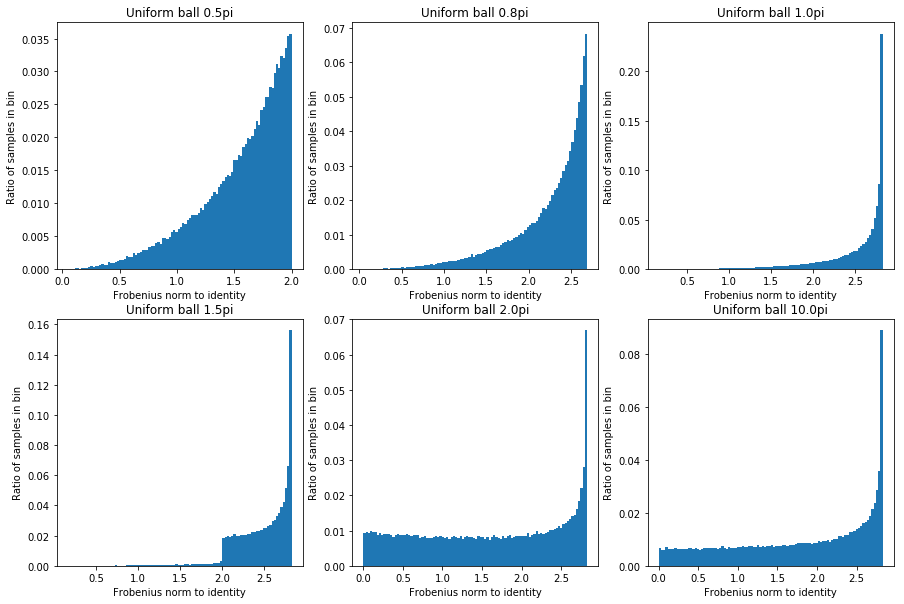

In [234]:
scales = np.array([0.5, 0.8, 1, 1.5, 2, 10]) * np.pi
n = 100000
rows, cols = (len(scales) - 1) // 3 + 1, 3
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows))
for scale, ax in zip(scales, axes.flatten()):
    samples = so3_exp(sample_uniform(scale, n))
    diff = samples - torch.eye(3).double()
    ds = (diff ** 2).sum(2).sum(1).sqrt()
    ax.set_title(f"Uniform ball {scale/np.pi:.1f}pi")
    ax.hist(np.array(ds), bins=100, weights=np.ones(len(samples)) / len(samples))
    ax.set_xlabel("Frobenius norm to identity")
    ax.set_ylabel("Ratio of samples in bin")
plt.show()

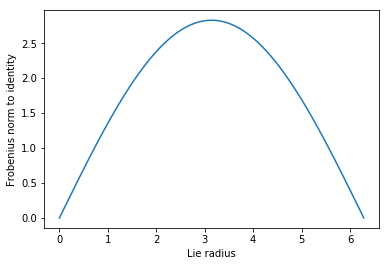

In [233]:
r = torch.linspace(0, 2 * np.pi, 1000)
v = r[:, None] * torch.tensor([1., 0, 0])
g = so3_exp(v.double())
n = ((g - torch.eye(3).double()) ** 2).sum(2).sum(1).sqrt()
plt.plot(np.array(r), np.array(n))
plt.xlabel("Lie radius")
plt.ylabel("Frobenius norm to identity")
plt.show()



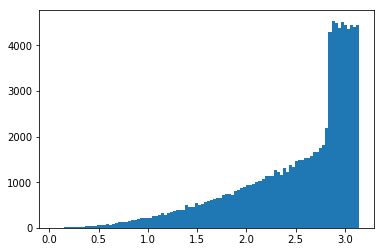

In [235]:
norms = so3_vee(so3_log(so3_exp(sample_uniform(1.1*np.pi, 100000)))).norm(2, 1)
plt.hist(norms, bins=100)
plt.show()

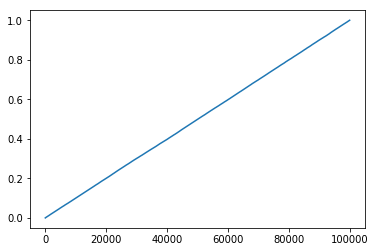

In [244]:
n = 100000
x = np.random.rand(n)
x = np.sort(x)
plt.plot(np.arange(n), x)
plt.show()